In [1]:
import sympy
import numpy
import scipy
import matplotlib.pyplot as plt

import datetime

import math

import pandas

import control

import scipy.optimize
from tbcontrol.responses import fopdt, sopdt
from ipywidgets import interact

import tclab

In [2]:
TCLab = tclab.setup(connected= True) #False, speedup=100)

Specifications

In [16]:
spans = 11
base_unit = 60*30 #Each span lasts base_unit seconds

q_init = 0
q_final = 100

setpoint = 30

In [17]:
increment = (q_final-q_init)/(spans-1)

run_time = base_unit*spans

In [19]:
str(datetime.timedelta(seconds=run_time)), increment

('5:30:00', 10.0)

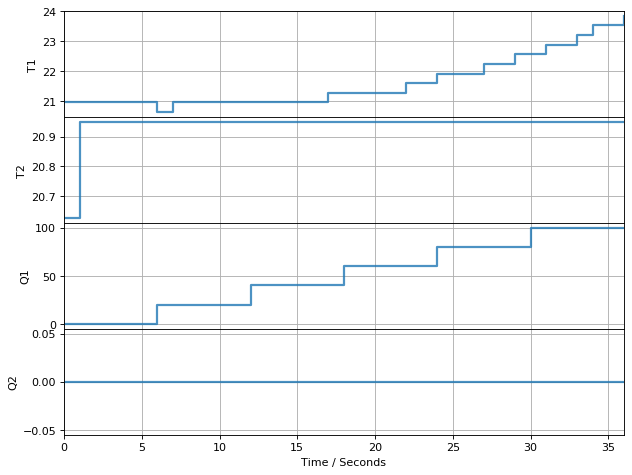

TCLab Model disconnected successfully.


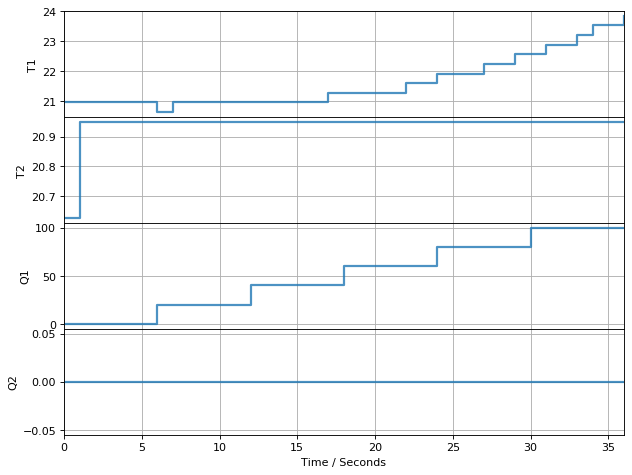

In [9]:
with TCLab() as lab:
    h = tclab.Historian(lab.sources)
    tcplot = tclab.Plotter(h, run_time)
    q_test = q_init
    
    base_unit_checker = 1
    
    for t in tclab.clock(run_time):
        
        base_unit_counter = t/base_unit
        
        print(base_unit_counter, base_unit_checker, t)
        
        if base_unit_counter == base_unit_checker:
            
            base_unit_checker = base_unit_counter+1
            q_test += increment
        lab.Q1(q_test)
        tcplot.update(t)

In [ ]:
h.get_sessions()

In [ ]:
h.load_session(1)

In [ ]:
data = {"Time" : h.t, "T1" : h.logdict['T1'], "T2" : h.logdict['T2'], "Q1" : h.logdict['Q1'], "Q2" : h.logdict['Q2']}

In [ ]:
data_frame = pandas.DataFrame(data = data)
data_frame.to_csv("long_span_run 20200226")

In [ ]:
[K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, h.t, h.logdict['T1'], [2, 4, 100, 50])
[K, tau, theta, y0]

In [ ]:
for span in range(spans):
    lower = span*base_unit
    upper = (span+1)*base_unit
    
    
    
    [K, tau, theta, y0], _ = scipy.optimize.curve_fit(fopdt, numpy.array(h.t[lower:upper])-h.t[lower], h.logdict['T1'][lower:upper], [2, 4, 100, 50])

    print([K, tau, theta, y0])
    print( fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))
    
    plt.plot(h.t, h.logdict['T1'])
    plt.plot(h.t[lower:upper], fopdt(numpy.array(h.t[lower:upper])-h.t[lower], K, tau, theta, y0))